In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc-2/packages/lib/v0.6/LearningMPC.ji for module LearningMPC.


In [3]:
robot = Hopper()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7006...
zmq_url=tcp://127.0.0.1:6006
web_url=http://127.0.0.1:7006/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x000000000641aa40, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x000000000626c9c0, Base.Filesystem._FDWatcher(Ptr{Void} @0x000000000626c600, 67, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x000000000626c9c0, Base.Filesystem._FDWatcher(Ptr{Void} @0x000000000626c600, 67, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7006/static/", "tcp://127.0.0.1:6006", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x6f, 0x6f, 0x72, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"core"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6c, 0x6f, 0x6f, 0x72, 0x2f, 0x63, 0x6f, 0x72, 0x65], Dict("after_base_z"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x65, 0x72, 0x5f, 0x62, 0x61, 0x73, 0x65, 0x5f, 0x7a], Dict("geometry_2"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"foot"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x63, 0x6f, 0x72, 0x65, 0x2f, 0x66, 0x6f, 0x6f, 0x74], Dict("after_foot_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0x73, 0x69, 0x6f, 0x6e], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))))))))))))))), 7006, HttpServer.Server(HttpServer.HttpHandler(MeshCat.ZMQServer.handle_file_request, Base.TCPServer(RawFD(47) active), Dict{String,Function}(Pair{String,Function}("error", HttpServer.#1),Pair{String,Function}("listen", HttpServer.#3))), WebSockets.WebSocketHandler(MeshCat.ZMQServer.#5)), ZMQ.Context(Ptr{Void} @0x00000000064acf10, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x00000000064c5480, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000006560730, 54, (1, 0), Condition(Any[]), (false, false), 0)), ZMQ.Socket(Ptr{Void} @0x00000000064d0000, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000006585850, 55, (1, 0), Condition(Any[]), (false, false), 0)), ZMQ.Socket(Ptr{Void} @0x0000000006567360, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000061ea490, 56, (1, 0), Condition(Any[]), (false, false), 0)), ZMQ.Socket(Ptr{Void} @0x000000000641a320, Base.Filesystem._FDWatcher(Ptr{Void} @0x000000000627d340, 57, (1, 0), Condition(Any[]), (false, false), 0)), ZMQ.Socket(Ptr{Void} @0x

In [16]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params)
net, loss = LearningMPC.interval_net([4, 32, 32, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

In [17]:
x0 = nominal_state(robot)
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), params.Δt, 100, params.lcp_solver);

In [18]:
playback(mvis, results, params.Δt)

In [19]:
full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller])

(::MPCController) (generic function with 1 method)

In [20]:
x0 = nominal_state(robot)
results = LCPSim.simulate(x0, full_mpc_controller, environment(robot), params.Δt, 100, params.lcp_solver);

In [21]:
playback(mvis, results, params.Δt)

In [27]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = MechanismState(robot.mechanism)
set_configuration!(x_init, [1, 1])

function collect_into!(data::Vector{<:LearningMPC.Sample})
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, 1.5)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 50, 
        params.lcp_solver);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

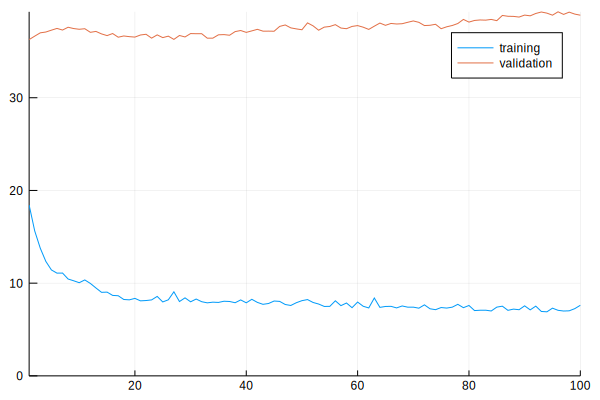

  1.114030 seconds (1.25 M allocations: 80.589 MiB, 3.22% gc time)


Progress:   5%|██                                       |  ETA: 0:02:15

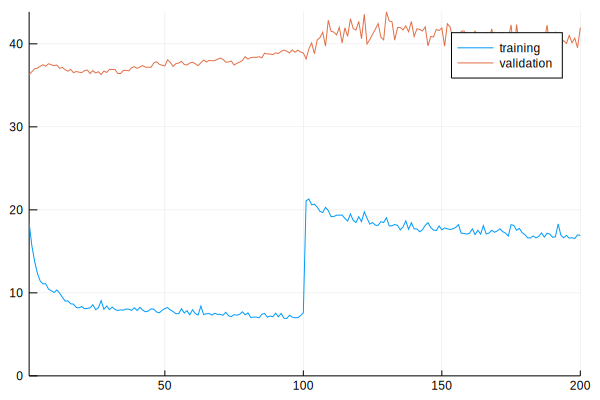

  1.878449 seconds (2.40 M allocations: 155.988 MiB, 3.21% gc time)


Progress:  10%|████                                     |  ETA: 0:02:07

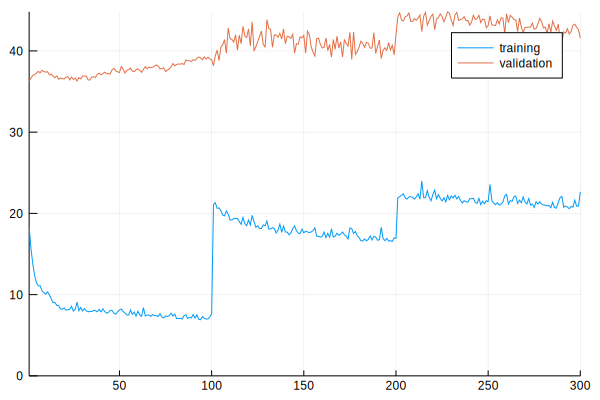

  2.683175 seconds (3.50 M allocations: 227.899 MiB, 3.13% gc time)


Progress:  15%|██████                                   |  ETA: 0:02:16

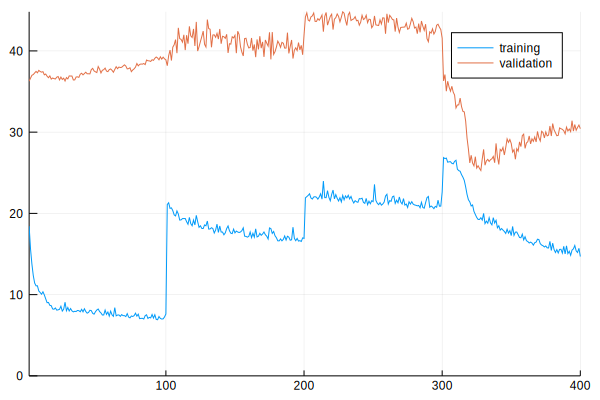

  3.626229 seconds (4.75 M allocations: 308.861 MiB, 2.87% gc time)


Progress:  20%|████████                                 |  ETA: 0:02:16

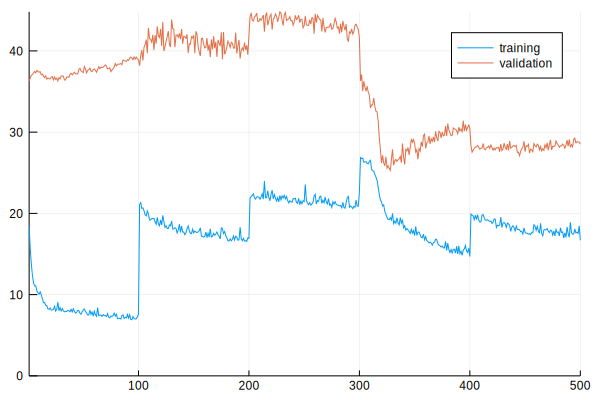

  4.700646 seconds (6.13 M allocations: 399.080 MiB, 2.87% gc time)


Progress:  25%|██████████                               |  ETA: 0:02:18

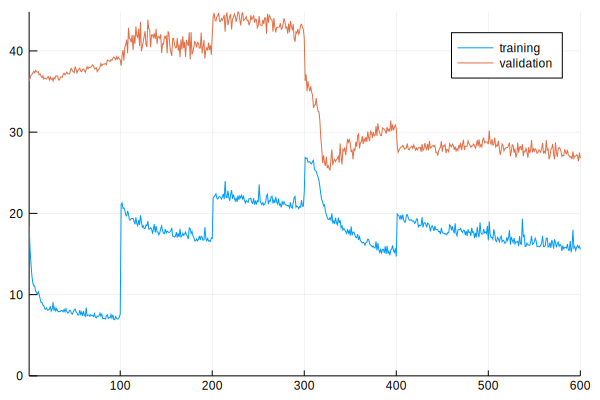

  5.558411 seconds (7.32 M allocations: 476.214 MiB, 2.79% gc time)


Progress:  30%|████████████                             |  ETA: 0:02:13

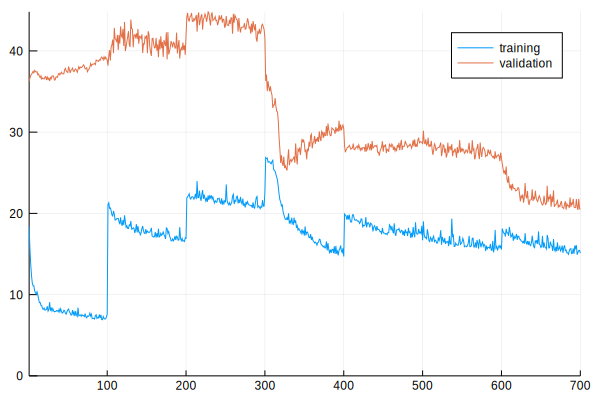

  6.751644 seconds (8.93 M allocations: 580.882 MiB, 2.99% gc time)


Progress:  35%|██████████████                           |  ETA: 0:02:13

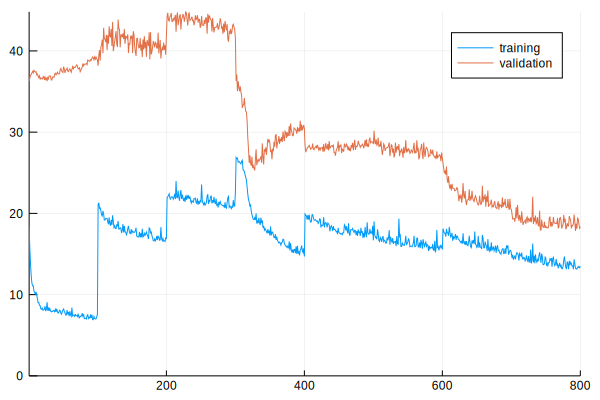

  7.840418 seconds (10.21 M allocations: 664.546 MiB, 2.98% gc time)


Progress:  40%|████████████████                         |  ETA: 0:02:11

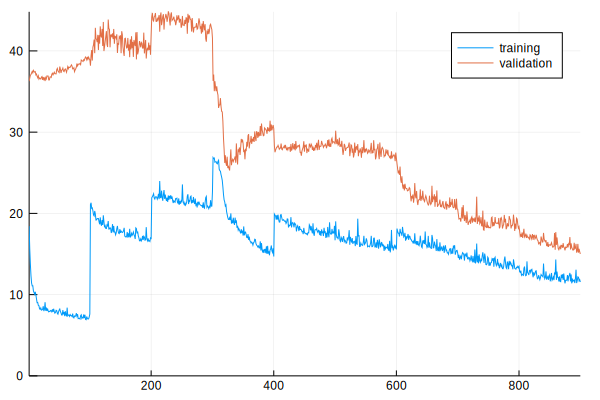

  8.579125 seconds (11.32 M allocations: 737.033 MiB, 3.05% gc time)


Progress:  45%|██████████████████                       |  ETA: 0:02:05

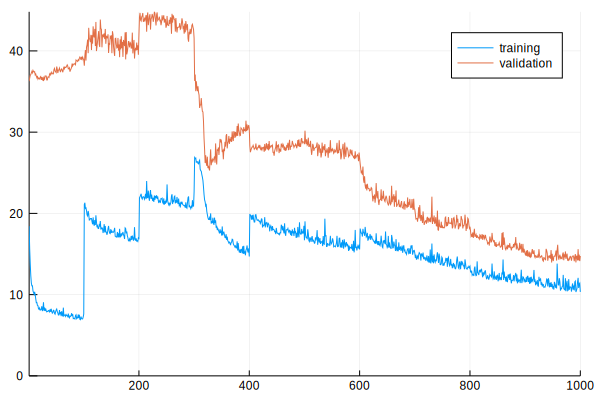

  9.834366 seconds (12.98 M allocations: 844.984 MiB, 3.11% gc time)


Progress:  50%|████████████████████                     |  ETA: 0:02:00

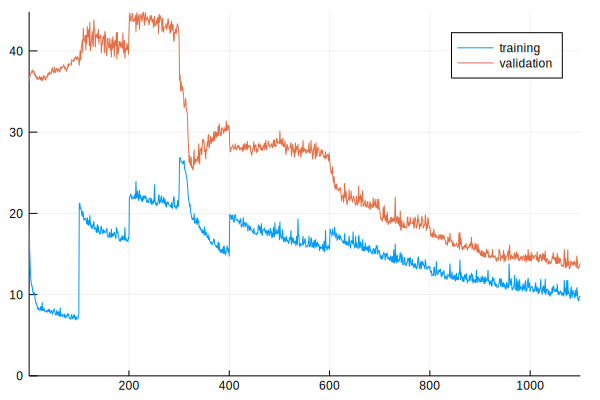

 11.098797 seconds (14.54 M allocations: 946.420 MiB, 3.06% gc time)


Progress:  55%|███████████████████████                  |  ETA: 0:01:54

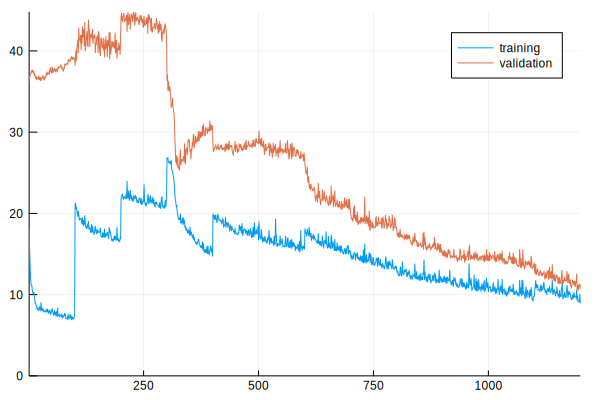

 11.838411 seconds (15.76 M allocations: 1.001 GiB, 3.13% gc time)


Progress:  60%|█████████████████████████                |  ETA: 0:01:45

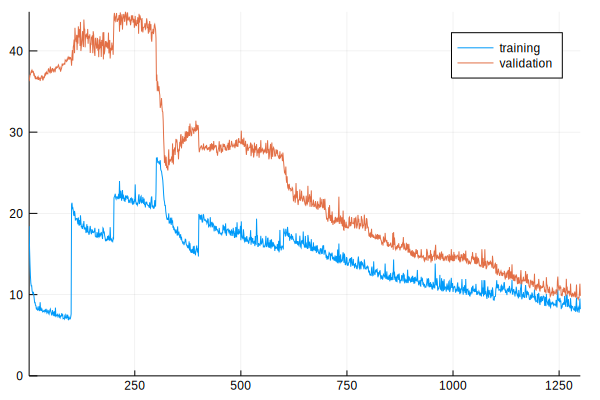

 12.718310 seconds (16.86 M allocations: 1.072 GiB, 3.11% gc time)


Progress:  65%|███████████████████████████              |  ETA: 0:01:35

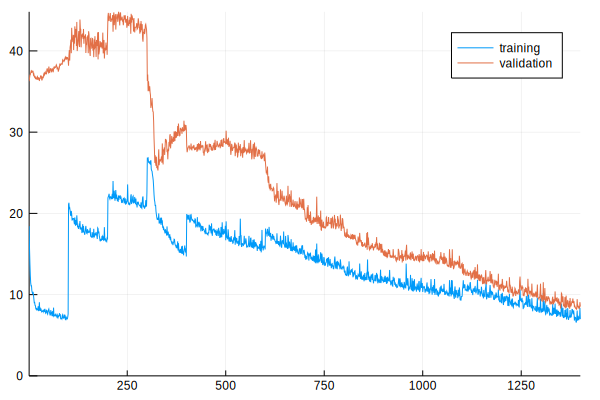

 13.623316 seconds (17.97 M allocations: 1.142 GiB, 3.19% gc time)


Progress:  70%|█████████████████████████████            |  ETA: 0:01:24

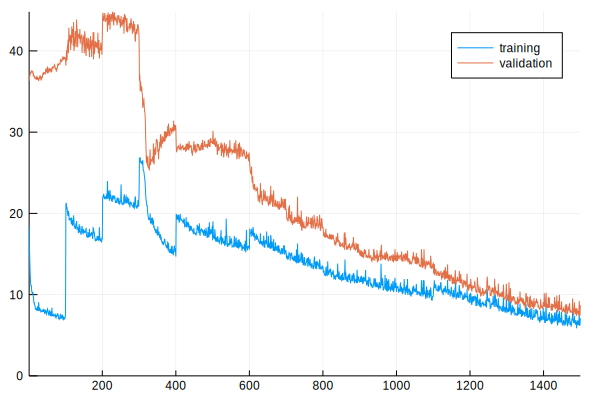

 14.773570 seconds (19.30 M allocations: 1.227 GiB, 3.17% gc time)


Progress:  75%|███████████████████████████████          |  ETA: 0:01:13

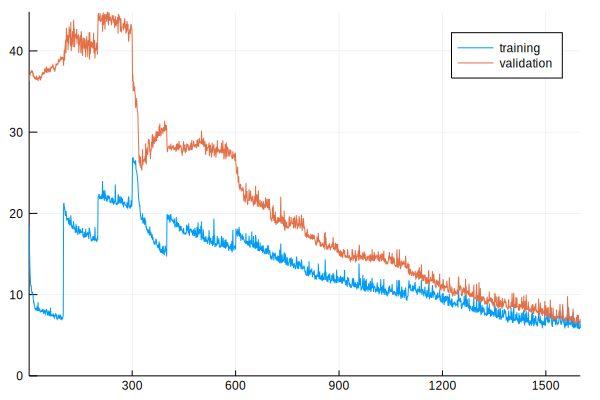

 15.803555 seconds (20.59 M allocations: 1.309 GiB, 3.15% gc time)


Progress:  80%|█████████████████████████████████        |  ETA: 0:01:00

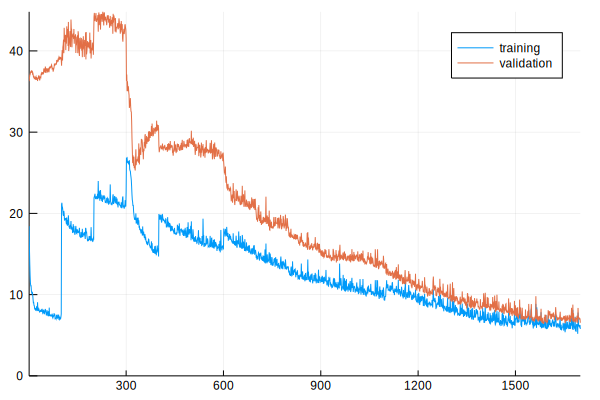

 16.493874 seconds (21.79 M allocations: 1.385 GiB, 3.22% gc time)


Progress:  85%|███████████████████████████████████      |  ETA: 0:00:46

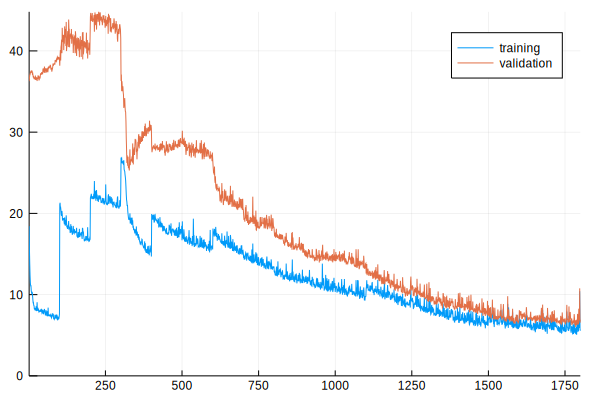

 17.512253 seconds (23.13 M allocations: 1.470 GiB, 3.18% gc time)


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:32

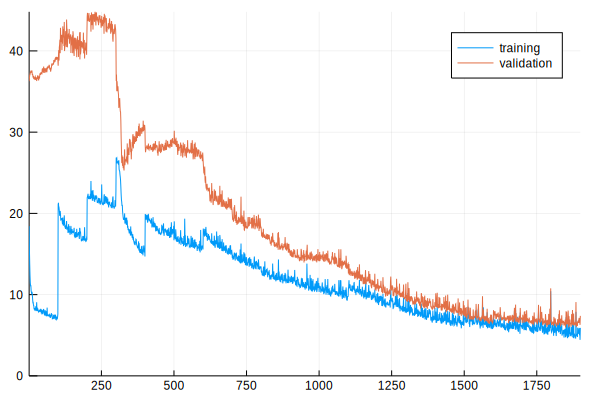

 18.596063 seconds (24.70 M allocations: 1.570 GiB, 3.27% gc time)


Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:17

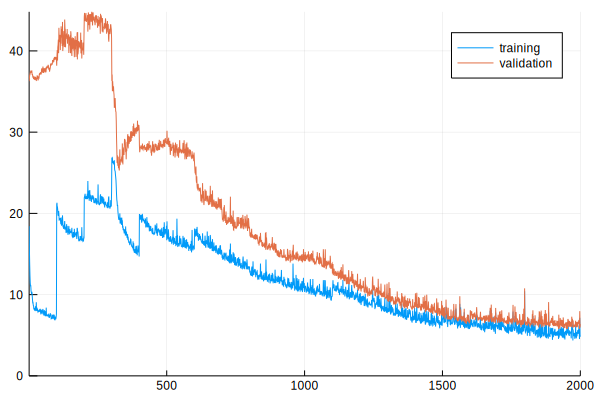

 19.453888 seconds (25.84 M allocations: 1.644 GiB, 3.26% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 0:05:42


In [29]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

@showprogress for i in 1:20
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data)
    collect_into!(dataset.validation_data)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    
    @time for i in 1:100
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("hopper.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [36]:
x0 = nominal_state(robot)
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), params.Δt, 100, params.lcp_solver);

In [37]:
playback(mvis, results, params.Δt)